### Chapter 6.2
# Z-Transform and Discrete Fourier Transform
---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

In the analysis and the numerical evaluation of analytical results for discrete-time models, transform methods for discrete-time functions play an important role, e.g. the *Discrete Fourier Transform (DFT)* and the associated *Fast Fourier Transform (FFT)*. 

A comparison with the definition of the Discrete Fourier Transform shows that for the class of finite distributions, the Discrete Fourier Transform can be used instead of the Z-transform.

Accordingly, the inverse Z-transform can be replaced by the inverse Discrete Fourier Transform ($DFT^{-1}$).
This allows the use of efficient methods and algorithms for evaluating the Discrete Fourier Transform like the Fast Fourier Transform, which were developed in the context of signal processing.

## Z-Transform
The Z-transform of the distribution $x(i)$ of a non-negative discrete random variable $ X $ is defined as

$ \displaystyle
X_{ZT}(z) = ZT\{x(i)\}  = \sum_{i=0}^\infty x(i) z^{-i} = E[z^{-X}]
$

In the examples, we consider a GEOM(1) distribution. Note that we need to truncate the distribution to get a finite discrete distribution which is supported by the module `discreteTimeAnalysis`. The Z-transform of the GEOM(1) distribution with $E[A]=\frac{1}{1-\alpha}$ is

$ \displaystyle
 A_{ZT}(z) = \frac{1 - \alpha}{z - \alpha} \quad \text{with } \alpha = 1-\frac{1}{E[A]}
$ 

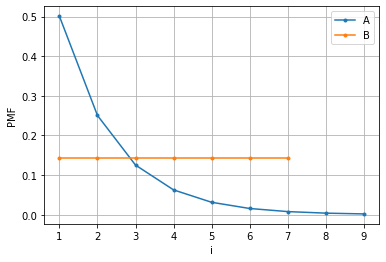

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from discreteTimeAnalysis import *
import math

EA = 2.0
alpha = 1-1/EA
A = GEOM(EA, m=1) # GEOM_0 with EA 
A.trimPMF(1e-3) # truncated distribution

B = DU(1,7)

A.plotPMF(label='A')
B.plotPMF(label='B')
plt.xlabel('i')
plt.ylabel('PMF')
plt.legend();
plt.grid(which='major');

We compare the closed form $ A_{ZT}(z) = \frac{1 - \alpha}{z - \alpha} \quad \text{with } \alpha = 1-\frac{1}{E[A]}$ with the numerical Z-transform.

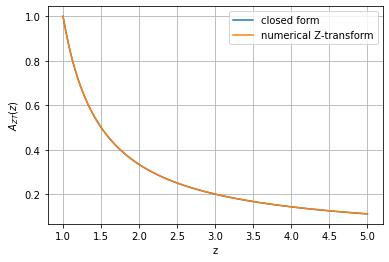

In [15]:
def ztransform(A):
    def zt(z):        
        return np.sum(A.pk*(z**(-A.xk)))    
    return zt

A_zt = ztransform(A)

n = np.arange(A.xmax)
z = np.linspace(1,5,100)

y = np.vectorize(A_zt)(z)
plt.plot(z, (1-alpha)/(z-alpha), label='closed form')
plt.plot(z, y, label='numerical Z-transform' )
plt.grid(which='major')
plt.xlabel('z')
plt.ylabel('$A_{ZT}(z)$')
plt.legend();

## Inverse Transform
A comparison with the definition of the Discrete Fourier Transform shows that for the class of finite distributions, the Discrete Fourier Transform can be used instead of the Z-transform. Accordingly, the inverse Z-transform can be replaced by the inverse DFT. We use the inverse discrete Fourier transform provided by numpy: [`numpy.fft.ifft`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html)

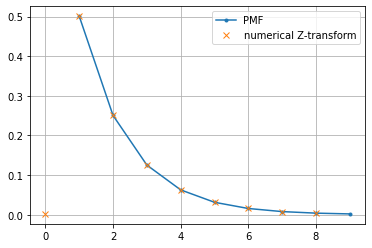

In [16]:
n = np.arange(A.xmax)
z = np.exp(n*complex(0,1)*2*math.pi/A.xmax) # evaluate the z-transform at the right places
y = np.vectorize(A_zt)(z) # compute the z-transform

A.plotPMF(label='PMF')
iz = np.fft.ifft(y) # inverse DFT
plt.grid(which='major')
plt.plot(iz.real, 'x', label='numerical Z-transform' )
plt.legend();

## Derive Sum of Random Variables using DFT

Let $X$ be the sum of two statistically independent discrete random variables $X_1$ and $X_2$ with corresponding distributions $x_1(i)$ and $x_2(i)$. The sum $ X = X_1 + X_2$ has the distribution $x(i) = x_1(i) * x_2(i)$ based on the discrete convolution. The Z-transform turns the convolution of the distributions into a multiplication of the transforms.

$  \displaystyle
X_{ZT}(z)        = X_{1,ZT}(z) \cdot  X_{2,ZT}(z)
$

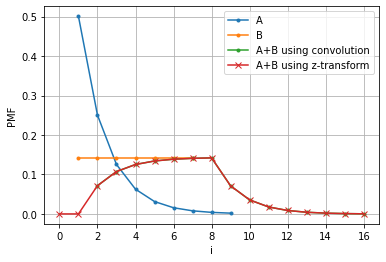

In [9]:
C = A+B
A.plotPMF(label='A')
B.plotPMF(label='B')
C.plotPMF(label='A+B using convolution')

# Generate probability vectors of same length
xmax = A.xmax+B.xmax
p1, p2 = np.zeros(xmax+1), np.zeros(xmax+1)
p1[A.xmin:A.xmax+1] = A.pk
p2[B.xmin:B.xmax+1] = B.pk

# Discrete Fourier transform of distributions
A_fft = np.fft.fft(p1)
B_fft = np.fft.fft(p2)

# Inverse DFT of the product of DFTs returns the PMF or the sum
y = np.fft.ifft(A_fft*B_fft)

plt.plot(y.real, 'x-', label='A+B using z-transform')
plt.legend()
plt.xlabel('i')
plt.ylabel('PMF')
plt.grid(which='major')
